# Convert Controllers to Discrete Time

In [1]:
import requests as req,os
URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

import cmath #, sympy 
from sympy import Symbol, atan, pi, tan, sqrt, solve, log
from numpy.polynomial import Polynomial
from numpy import inf

from control.matlab import tf, rlocus, step, feedback, lsim, bode, c2d
from control import pade

from control_materials import *

Running Python: 3.12.6
Running Sympy: 1.13.2
Control Package Found
Basic file found


In [2]:
# set a sampling time
Ts = 50e-6
print(f"{Ts = :.2e}s")

# design a simple lead controller
wc = 300*2*np.pi
z = np.sqrt(wc**2/10)
p = 10*z
sysc = tf([1, z], [1, p])

print(f"Control zero {z = :.3f}")
print(f"Control Pole {p = :.3f}")

# Convert to discrete time
sysd =c2d(sysc, Ts, method='bilinear')
print(r"$(Az+B){z+C}$")
print(f"Discrete A = {float(sysd.num[0][0][0]):>10.7f}")
print(f"Discrete B = {float(sysd.num[0][0][1]):>10.7f}")
print(f"Discrete C = {float(sysd.den[0][0][1]):>10.7f}")
sysd

Ts = 5.00e-05s
Control zero z = 596.075
Control Pole p = 5960.753
$(Az+B){z+C}$
Discrete A =  0.8832770
Discrete B = -0.8573385
Discrete C = -0.7406155


TransferFunction(array([   0.883,   -0.857]), array([   1.000,   -0.741]), 5e-05)

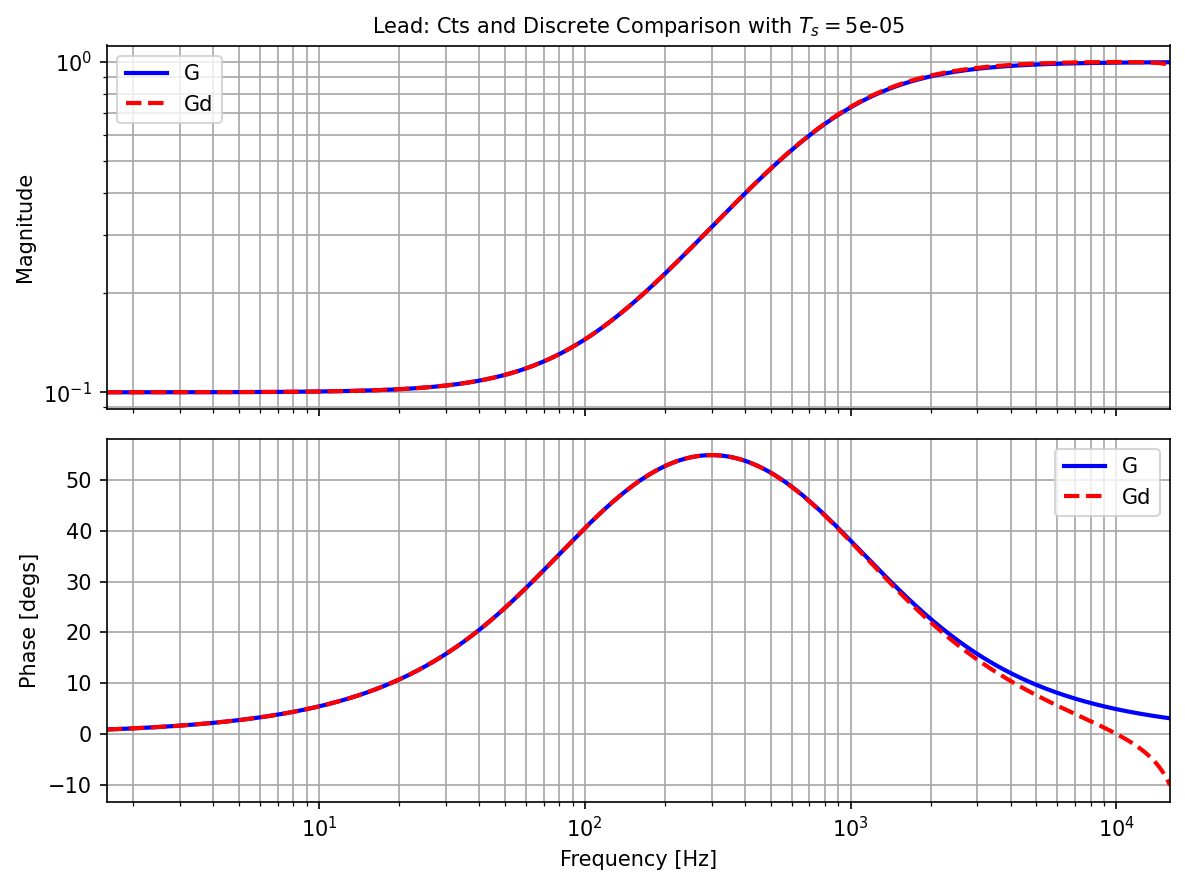

In [3]:
w = np.sort(np.append(logspace(1,5,2000),wc))

[Gm,Gp,Gw] = bode(sysc,w,plot=False)
[Gmd,Gpd,Gwd] = bode(sysd,w,plot=False)

fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=150,sharex = True)
ax[0].loglog(Gw/2/np.pi,Gm,'b-',label='G')
ax[0].loglog(Gwd/2/np.pi,Gmd,'r--',label='Gd')
ax[1].semilogx(Gw/2/np.pi,pshift(Gp)*r2d,'b-',label='G')
ax[1].semilogx(Gwd/2/np.pi,pshift(Gpd)*r2d,'r--',label='Gd')
ax[1].set_xlim([min(w/2/np.pi),max(w/2/np.pi)])
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_ylabel("Phase [degs]")
ax[0].set_ylabel("Magnitude")
ax[0].grid(True, which="both", ls="-",color='0.65')
ax[1].grid(True, which="both", ls="-",color='0.65')
ax[0].set_title("Lead: Cts and Discrete Comparison with $T_s=$"+str(Ts))
ax[0].legend()
ax[1].legend()
plt.show()

## Example 2 

Ts = 2.00e-05 s
z = 596.0753, p = 5960.7530, k_c = 10.1867
A =  9.6709543
B = -9.5563452
C =  1.0000000


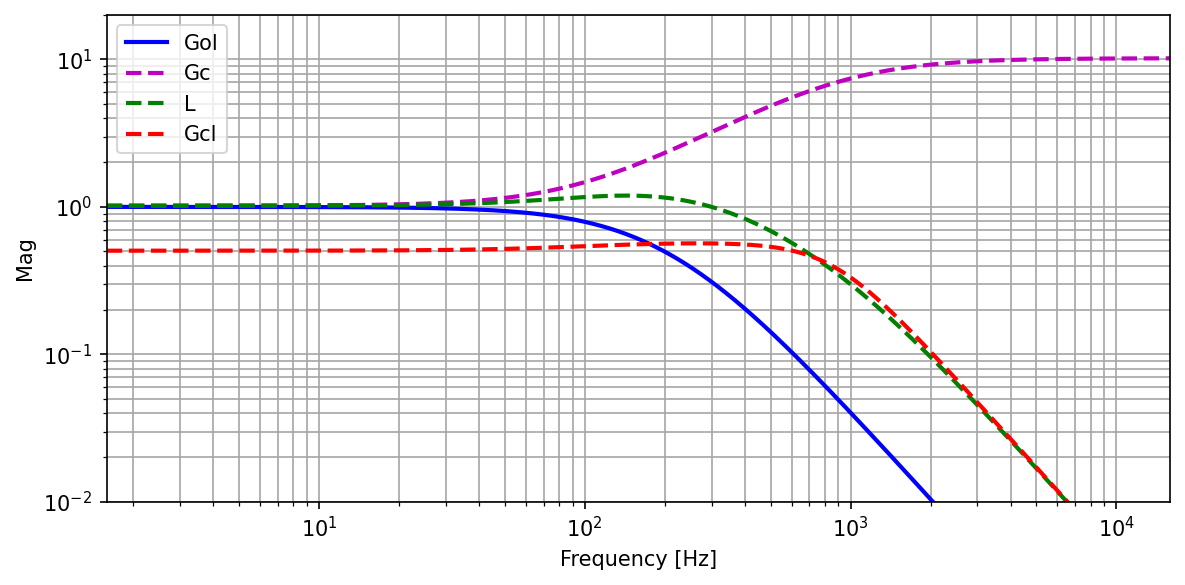

In [4]:
j = complex(0,1)
# simple RLC systems
CC = 2*10e-6 # capacitor value
LL = 30e-3 # inductor value
RR = 80 # res value
a=1;b=RR/LL;c=1/LL/CC
Gol = tf([c],[a,b,c])

# Set sample time
Ts = 20e-6
print(f"{Ts = :3.2e} s")

# Design simple controller
gamma = 10
wc = 300*2*np.pi
z = np.sqrt(wc**2/gamma)
p = gamma*z
sysc = tf([1, z], [1, p])

w = np.sort(np.append(logspace(1,5,2000),wc))
f = w/2/np.pi

L = Gol*sysc
k_c = np.abs(1/L(j*wc))
print(f"{z = :6.4f}, {p = :6.4f}, {k_c = :6.4f}")
sysc = k_c*sysc
sysd = c2d(sysc, Ts, method='bilinear')

L = Gol*sysc  # apply gain to loop
Gcl = feedback(L,1)

# Make some plots
[Golm,Golp,Golw] = bode(Gol,w,plot=False)
[Gm,Gp,Gw] = bode(sysc,w,plot=False)
[Lm,Lp,Lw] = bode(L,w,plot=False)
[Gclm,Gclp,Gclw] = bode(Gcl,w,plot=False)
[Gmd,Gpd,Gwd] = bode(sysd,w,plot=False)

print(f"A = {float(sysd.num[0][0][0]):>10.7f}")
print(f"B = {float(sysd.num[0][0][1]):>10.7f}")
print(f"C = {float(sysd.den[0][0][0]):>10.7f}")

fig, ax = plt.subplots(1,figsize=(8, 4),dpi=150,sharex = True)
ax.semilogx(f,Golm,'b-',label='Gol')
ax.loglog(f,Gm,'m--',label='Gc')
ax.semilogx(f,Lm,'g--',label='L')
ax.semilogx(f,Gclm,'r--',label='Gcl')
ax.legend()
ax.set_xlim([min(f),max(f)])
ax.set_ylim([1e-2,2e1])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Mag")
ax.grid(True, which="both", ls="-",color='0.65')
plt.legend()
plt.show()